In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.12.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_files_enron123.csv')
data

,text,label
0,"Subject: what up , , your cam babe\nwhat are y...",spam
1,Subject: want to make more money ?\norder conf...,spam
2,Subject: food for thoughts\n[\njoin now - take...,spam
3,Subject: miningnews . net newsletter - tuesday...,spam
4,Subject: your pharmacy ta\nwould you want chea...,spam
...,...,...
16536,Subject: 8 : 30 am trade counts\noff to a weak...,ham
16537,Subject: re : new organisation for maximising ...,ham
16538,Subject: fw : info : please read - - feb 1 chu...,ham
16539,Subject: sf gate : text of gov . gray davis ' ...,ham


In [ ]:
data.rename(columns = {'text':'text', 'label':'spam'},
                         inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['spam'] = le.fit_transform(data['spam'])

Text(0.5, 1.0, 'Spam/ham Data Distribution')

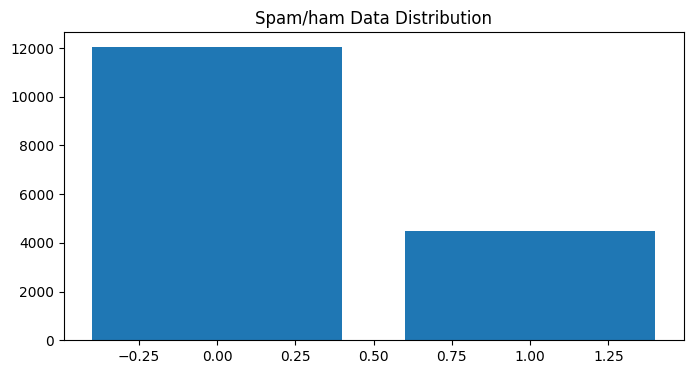

In [ ]:
val_count = data.spam.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Spam/ham Data Distribution")

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [ ]:
data.head()

,text,spam
0,"Subject: what up , , your cam babe\nwhat are y...",1
1,Subject: want to make more money ?\norder conf...,1
2,Subject: food for thoughts\n[\njoin now - take...,1
3,Subject: miningnews . net newsletter - tuesday...,1
4,Subject: your pharmacy ta\nwould you want chea...,1


In [ ]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
data.text = data.text.apply(lambda x: preprocess(x))


In [ ]:
data.head()


,text,spam
0,"subject: , , cam babe looking ? looking compan...",1
1,subject: want make money ? order confirmation ...,1
2,subject: food thoughts [ join - take free tour...,1
3,subject: miningnews . net newsletter - tuesday...,1
4,subject: pharmacy ta would want cheap perscrip...,1


In [ ]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Spam Word Cloud')

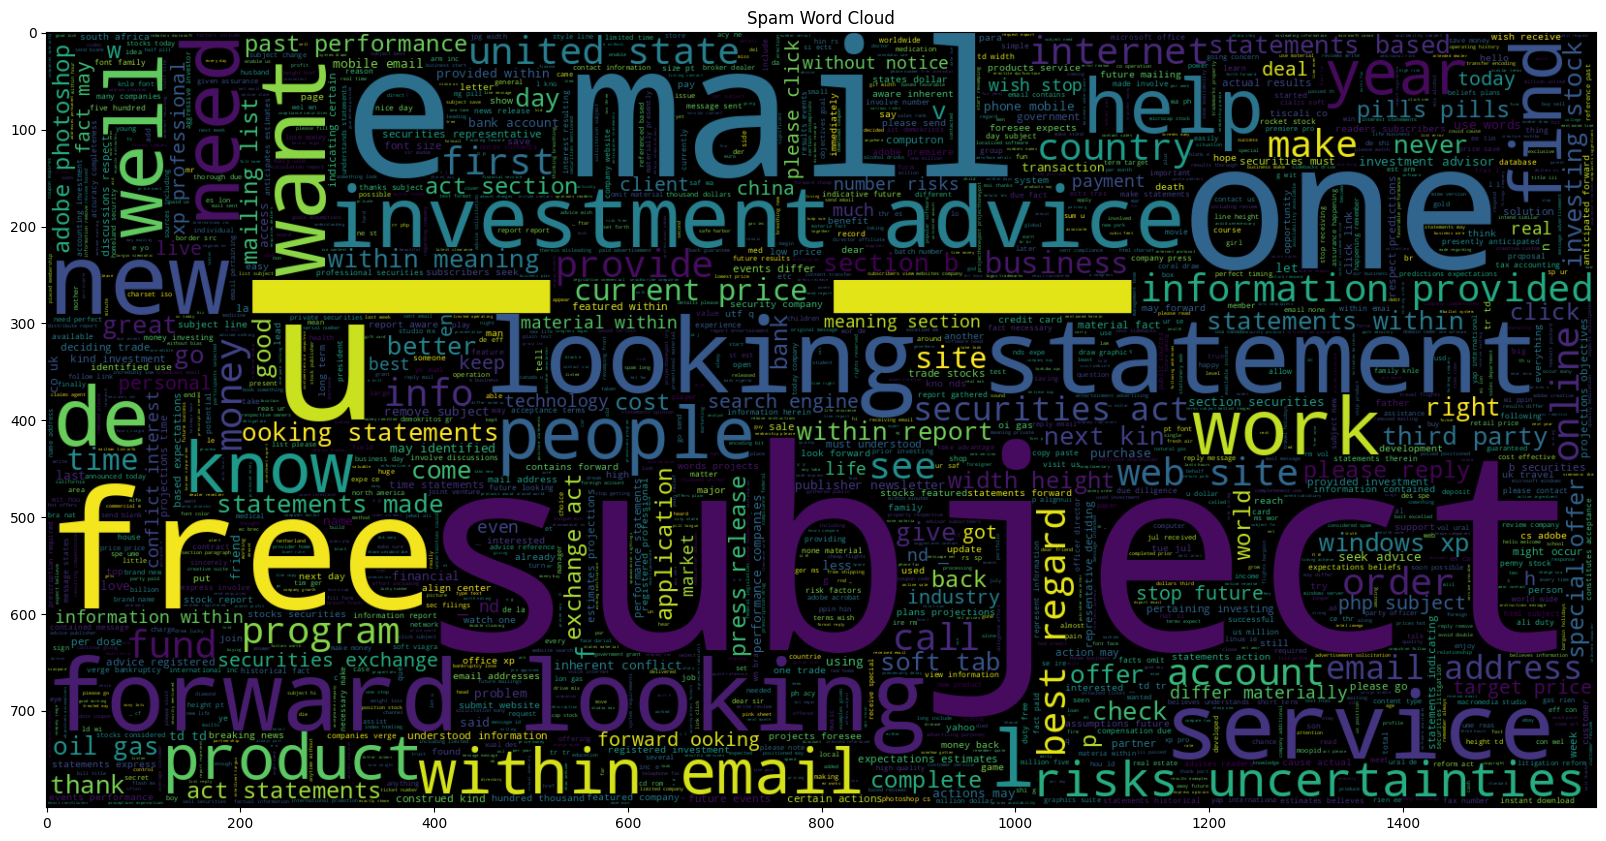

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.spam == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

Text(0.5, 1.0, 'Ham Word Cloud')

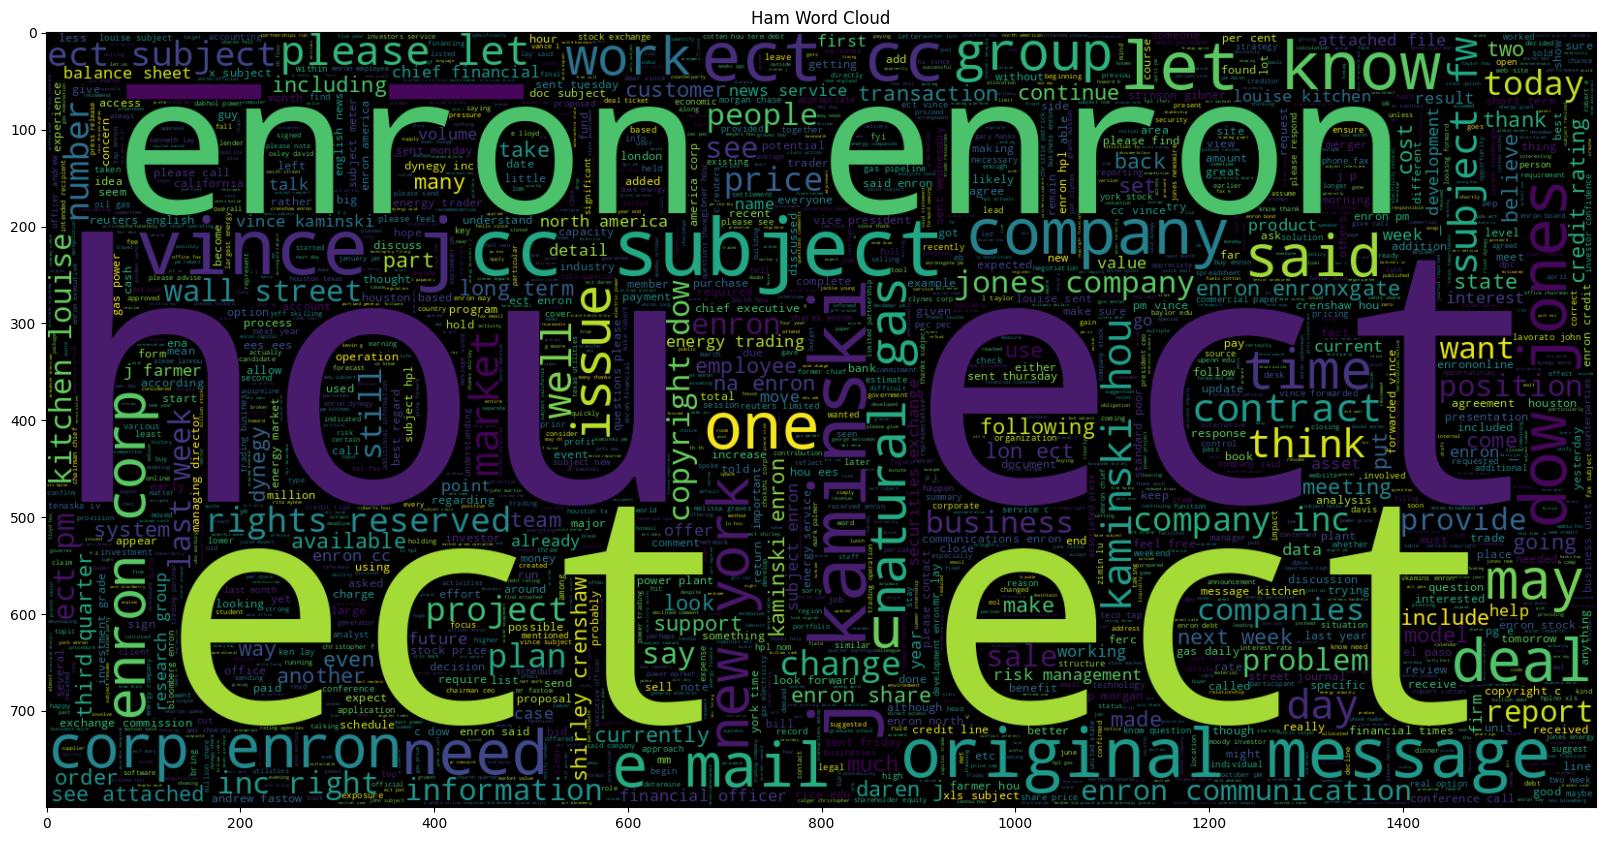

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.spam == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 50

In [ ]:
x = data['text']
y = data['spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 13232
Test Data size 3309


In [ ]:
x_train.head(10)


1303     subject: human viruses blown away ! ! ! ancien...
15286    subject: : brian : sounds like good idea , ' h...
16030    subject: permitting follow - meeting loretta (...
713      subject: best defense spam receive vast amount...
3552     subject: april golf specials ! ! welcome & enj...
5075     subject: deals extended meter 985097 - 12 / 00...
1935     subject: enron / hpl nom november 18 , 2000 ( ...
4637     subject: gas management agreement attached red...
9333     subject: : pending approval ibuyit request win...
10914    subject: : enron exotica options library patri...
Name: text, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)


Vocabulary Size : 89288


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (13232, 50)
Testing X Shape: (3309, 50)


In [ ]:
y_test.shape


(3309,)

In [ ]:
x_train


array([[23688,  7314, 27927, ...,  4139, 34581, 47471],
       [ 4185,    59,   393, ...,    33,  1626,   666],
       [   20,  1504,   586, ...,   360,  1122,  4476],
       ...,
       [    0,     0,     0, ...,   316,    39,   988],
       [ 1765,  2991,  8380, ...,  1326,   766,   387],
       [ 1870, 14156,   108, ...,   184,    15, 27865]], dtype=int32)

In [ ]:
#LSTM hyperparameters
n_lstm = 200
drop_lstm =0.2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
embeding_dim = 16

In [ ]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [ ]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=4)
history = model2.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test),callbacks =[early_stop], verbose=2)

Epoch 1/30
414/414 - 61s - loss: 0.1690 - accuracy: 0.9331 - val_loss: 0.0428 - val_accuracy: 0.9893 - 61s/epoch - 148ms/step
Epoch 2/30
414/414 - 14s - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.0604 - val_accuracy: 0.9827 - 14s/epoch - 34ms/step
Epoch 3/30
414/414 - 10s - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.0406 - val_accuracy: 0.9868 - 10s/epoch - 24ms/step
Epoch 4/30
414/414 - 6s - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0526 - val_accuracy: 0.9848 - 6s/epoch - 15ms/step
Epoch 5/30
414/414 - 9s - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.0619 - val_accuracy: 0.9822 - 9s/epoch - 21ms/step
Epoch 6/30
414/414 - 6s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0612 - val_accuracy: 0.9845 - 6s/epoch - 15ms/step
Epoch 7/30
414/414 - 6s - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0801 - val_accuracy: 0.9827 - 6s/epoch - 15ms/step


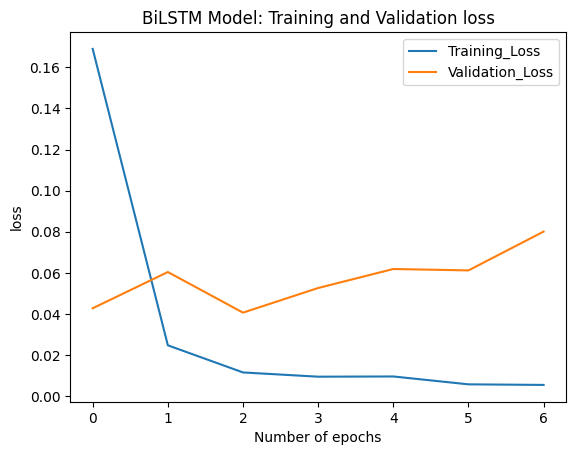

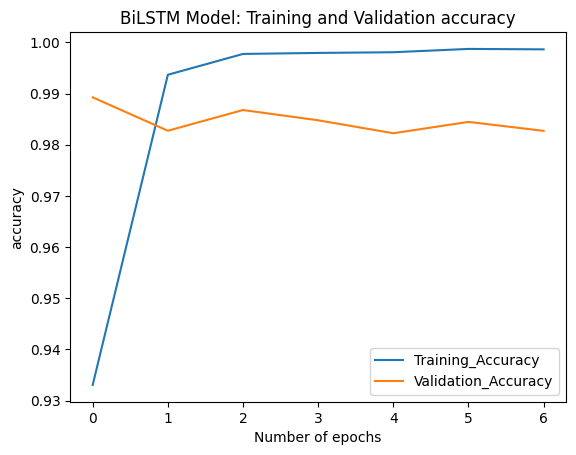

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
metrics.head()


,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.168953,0.933070,0.042751,0.989260
1,0.024726,0.993668,0.060388,0.982732
2,0.011529,0.997739,0.040631,0.986782
3,0.009460,0.997937,0.052614,0.984775
4,0.009567,0.998070,0.061865,0.982242


In [ ]:
y_pred = model2.predict(x_test)
y_pred.shape

104/104 [==============================] - 1s 7ms/step


(3309, 50, 1)

In [ ]:
def sigmoid(x):
    if x>=0.5:
        return 1
    else:
        return 0 

In [ ]:
for i in range (len(y_pred)):
    for j in range (len(y_pred[i])):
        y_pred[i][j]= sigmoid(y_pred[i][j])

In [ ]:
pred = []
for i in range (len(y_pred)):
    pred.append(int(y_pred[i].all()))


In [ ]:
len(pred)


3309

In [ ]:
pred 

In [ ]:
import numpy as np
pred_array = np.array(pred)


In [ ]:
pred_array

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [ ]:
print(classification_report(y_test, pred_array))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2477
           1       0.99      0.95      0.97       832

    accuracy                           0.99      3309
   macro avg       0.99      0.97      0.98      3309
weighted avg       0.99      0.99      0.99      3309

